# Importing Libraries

In [ ]:
import gzip
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.impute import SimpleImputer
from joblib import Parallel, delayed
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import f1_score
from IPython.core.display import Math
from sklearn import metrics
import math
import warnings
from sklearn.metrics import precision_recall_fscore_support

# Download Datset and Understand the Format

In [ ]:
# Reading The Dadasets
train = pd.read_csv('kddcup.data.gz', header=None)
test = pd.read_csv('corrected.gz', header=None)
print('===========================Train Dataset===================================')
print(train.head())
print(train.shape)
print('===========================Test Dataset===================================')
print(test.head())
print(test.shape)

===========================Train Dataset===================================
   0    1     2   3    4      5   6   7   8   9   ...  32   33   34    35  \
0   0  tcp  http  SF  215  45076   0   0   0   0  ...   0  0.0  0.0  0.00   
1   0  tcp  http  SF  162   4528   0   0   0   0  ...   1  1.0  0.0  1.00   
2   0  tcp  http  SF  236   1228   0   0   0   0  ...   2  1.0  0.0  0.50   
3   0  tcp  http  SF  233   2032   0   0   0   0  ...   3  1.0  0.0  0.33   
4   0  tcp  http  SF  239    486   0   0   0   0  ...   4  1.0  0.0  0.25   

    36   37   38   39   40       41  
0  0.0  0.0  0.0  0.0  0.0  normal.  
1  0.0  0.0  0.0  0.0  0.0  normal.  
2  0.0  0.0  0.0  0.0  0.0  normal.  
3  0.0  0.0  0.0  0.0  0.0  normal.  
4  0.0  0.0  0.0  0.0  0.0  normal.  

[5 rows x 42 columns]
(4898431, 42)
===========================Test Dataset===================================
   0    1        2   3    4    5   6   7   8   9   ...   32   33    34    35  \
0   0  udp  private  SF  105  146   0   0

In [ ]:
# Changing the Categorical Data into Numerical Data
cat_features = [1, 2, 3, 41]
for column in cat_features:
    train[column] = pd.Categorical(train[column])
    train[column] = train[column].cat.codes
train = train.astype(np.float32)

true_labels=train[41]
train=train.drop(41 , axis=1)
print(train)

          0    1     2    3      4        5    6    7    8    9   ...   31  \
0        0.0  1.0  24.0  9.0  215.0  45076.0  0.0  0.0  0.0  0.0  ...  0.0   
1        0.0  1.0  24.0  9.0  162.0   4528.0  0.0  0.0  0.0  0.0  ...  1.0   
2        0.0  1.0  24.0  9.0  236.0   1228.0  0.0  0.0  0.0  0.0  ...  2.0   
3        0.0  1.0  24.0  9.0  233.0   2032.0  0.0  0.0  0.0  0.0  ...  3.0   
4        0.0  1.0  24.0  9.0  239.0    486.0  0.0  0.0  0.0  0.0  ...  4.0   
...      ...  ...   ...  ...    ...      ...  ...  ...  ...  ...  ...  ...   
4898426  0.0  1.0  24.0  9.0  212.0   2288.0  0.0  0.0  0.0  0.0  ...  3.0   
4898427  0.0  1.0  24.0  9.0  219.0    236.0  0.0  0.0  0.0  0.0  ...  4.0   
4898428  0.0  1.0  24.0  9.0  218.0   3610.0  0.0  0.0  0.0  0.0  ...  5.0   
4898429  0.0  1.0  24.0  9.0  219.0   1234.0  0.0  0.0  0.0  0.0  ...  6.0   
4898430  0.0  1.0  24.0  9.0  219.0   1098.0  0.0  0.0  0.0  0.0  ...  7.0   

            32   33   34    35    36   37    38   39   40  
0  

In [ ]:
cat_features = [1, 2, 3, 41]
for column in cat_features:
    test[column] = pd.Categorical(test[column])
    test[column] = test[column].cat.codes
test = test.astype(np.float32)

true_labels_test=test[41]
test=test.drop(41 , axis=1)
print(test)

         0    1     2    3      4      5    6    7    8    9   ...     31  \
0       0.0  2.0  46.0  9.0  105.0  146.0  0.0  0.0  0.0  0.0  ...  255.0   
1       0.0  2.0  46.0  9.0  105.0  146.0  0.0  0.0  0.0  0.0  ...  255.0   
2       0.0  2.0  46.0  9.0  105.0  146.0  0.0  0.0  0.0  0.0  ...  255.0   
3       0.0  2.0  46.0  9.0  105.0  146.0  0.0  0.0  0.0  0.0  ...  255.0   
4       0.0  2.0  46.0  9.0  105.0  146.0  0.0  0.0  0.0  0.0  ...  255.0   
...     ...  ...   ...  ...    ...    ...  ...  ...  ...  ...  ...    ...   
311024  0.0  2.0  46.0  9.0  105.0  147.0  0.0  0.0  0.0  0.0  ...  255.0   
311025  0.0  2.0  46.0  9.0  105.0  147.0  0.0  0.0  0.0  0.0  ...  255.0   
311026  0.0  2.0  46.0  9.0  105.0  147.0  0.0  0.0  0.0  0.0  ...  255.0   
311027  0.0  2.0  46.0  9.0  105.0  147.0  0.0  0.0  0.0  0.0  ...  255.0   
311028  0.0  2.0  46.0  9.0  105.0  147.0  0.0  0.0  0.0  0.0  ...  255.0   

           32   33    34    35   36   37   38   39   40  
0       254.0  1.

# Clustering Using K-Means

In [ ]:
def show_result(data, centroids, labels, k):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(data[:,0], data[:,1], data[:,2], c='blue', alpha=0.5)
  ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c='red', s=100, marker='x')
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  ax.set_zlabel('Feature 3')
  plt.legend(['Data points', 'Centroids'])
  plt.show()
  print("Number of clusters:", k)
  print("Cluster labels:", np.unique(labels))

In [ ]:
def kmeans(X, K, max_iterations = 100):
    centroids = X[random.sample(range(X.shape[0]), K)]
    for i in range(max_iterations):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        empty_centroids = np.where(np.isnan(new_centroids).any(axis=1))[0]
        if empty_centroids.size > 0:
            for c in empty_centroids:
                new_centroids[c] = X[random.randint(0, X.shape[0]-1)]
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

In [ ]:
# Kmeans Evaluation
def kmeans_evaluation(test_data, centroids, true_labels):
  test_k = pd.concat([test_data], ignore_index=True).values
  distances = np.linalg.norm(test_k[:, np.newaxis] - centroids, axis=2)
  labels = np.argmin(distances, axis=1)
  precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, labels, average='weighted') 
  entropy_score = conditional_entropy(labels, true_labels)
  print("Precision k-means: ",precision)  
  print("F1 score k-means: ",f1_score)
  print("Recall k-means: ",recall)
  print("Conditional Entropy k-means: ",entropy_score)
  print('=======================================================================================')

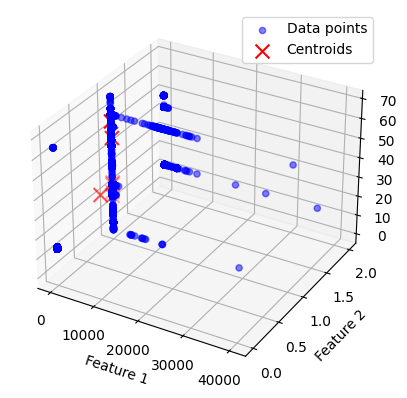

Number of clusters: 7
Cluster labels: [0 1 2 3 4 5 6]
Precision k-means:  8.728476882851296e-07
F1 score k-means:  1.3729703269608144e-06
Recall k-means:  6.430268560166415e-06
Conditional Entropy k-means:  1.1617832162376338e-05
None


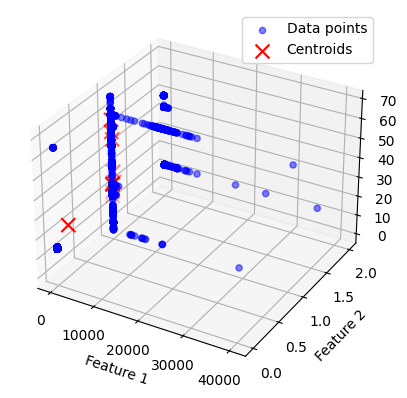

Number of clusters: 15
Cluster labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Precision k-means:  3.178502247748728e-06
F1 score k-means:  6.338109043140783e-06
Recall k-means:  0.0011349424008693723
Conditional Entropy k-means:  2.0601453238068026e-05
None


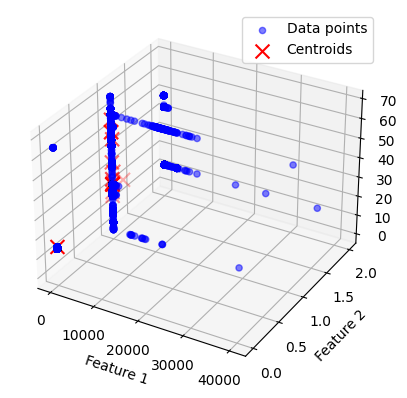

Number of clusters: 23
Cluster labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Precision k-means:  0.15784112584370377
F1 score k-means:  0.0014657372655000917
Recall k-means:  0.0040157027158239265
Conditional Entropy k-means:  2.780318987973665e-05
None


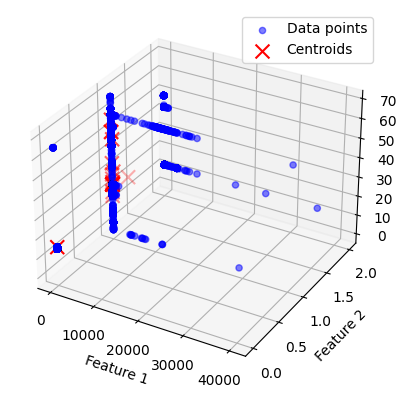

Number of clusters: 31
Cluster labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Precision k-means:  0.19420162882774497
F1 score k-means:  0.009925278870292967
Recall k-means:  0.005095987833931884
Conditional Entropy k-means:  3.217197040590756e-05
None


In [ ]:
warnings.filterwarnings('ignore')
k_values = [7, 15, 23, 31, 45]
train_k = train[: int(len(train) * 0.1)]
train_k = pd.concat([train_k], ignore_index=True).values
for k in k_values:
  labels, centroids = kmeans(train_k, k)
  show_result(train_k, centroids, labels, k)
  print(kmeans_evaluation(test, centroids, true_labels_test))

# Clustering Using Normalized Cut

In [ ]:
def graph_3NN (data):
  D = kneighbors_graph(data, 3, mode='connectivity', include_self=True)
  return D.toarray()

def Normalize(D):
  rowSums = D.sum(axis=1)
  return D / rowSums[:, np.newaxis];

def spectralClustering(D,K):
  delta = np.zeros((D.shape[0],D.shape[0]))
  for i in range(D.shape[0]):
    delta[i,i] = np.sum(D[i])
  B = np.identity(D.shape[0]) - np.dot(np.linalg.inv(delta),D)
  U = np.linalg.eigh(B)[1][:,:K]
  Y = Normalize(U);
  imputer = SimpleImputer(strategy='mean')
  Y_imputed = imputer.fit_transform(Y)
  plot(Y_imputed)
  return KMeans(n_clusters=K, random_state=42).fit(Y_imputed).labels_

def plot(Y):
  plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")
  ax.scatter3D(Y[:,0],Y[:,1], Y[:,2])
  plt.title("Normalized eign vectors")
  plt.show()

def ShowResults(result,N):
  print(f'result = {result}')
  for c in range(N):
     print(f'C{c+1} = {train_N[result == c]}')  
  return result

<ipython-input-10-4892c8694357>:7: RuntimeWarning: invalid value encountered in true_divide
  return D / rowSums[:, np.newaxis];


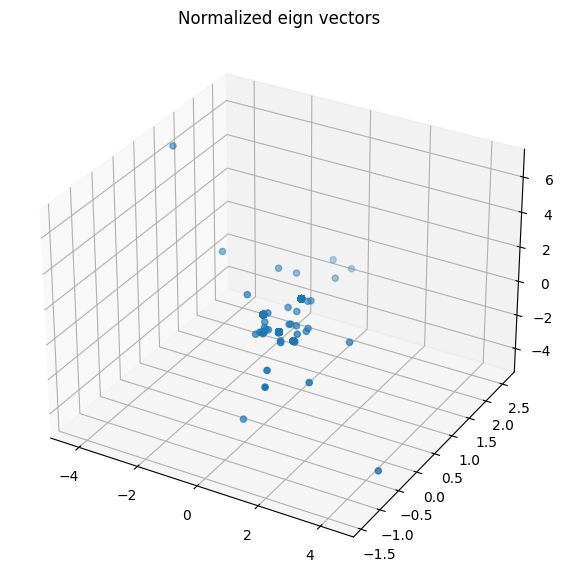

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


result = [0 0 0 ... 0 0 0]
C1 =           0    1     2    3       4       5    6    7    8    9   ...     31  \
1399261  0.0  1.0  24.0  1.0     0.0     0.0  0.0  0.0  0.0  0.0  ...    1.0   
649857   0.0  1.0  49.0  5.0     0.0     0.0  0.0  0.0  0.0  0.0  ...  255.0   
4822974  0.0  1.0  24.0  9.0   279.0   296.0  0.0  0.0  0.0  0.0  ...  255.0   
861609   0.0  1.0  24.0  9.0   305.0   502.0  0.0  0.0  0.0  0.0  ...   15.0   
1760842  0.0  0.0  15.0  9.0  1032.0     0.0  0.0  0.0  0.0  0.0  ...  255.0   
...      ...  ...   ...  ...     ...     ...  ...  ...  ...  ...  ...    ...   
4321480  0.0  0.0  15.0  9.0   520.0     0.0  0.0  0.0  0.0  0.0  ...  255.0   
2541949  0.0  0.0  15.0  9.0  1032.0     0.0  0.0  0.0  0.0  0.0  ...  255.0   
200003   0.0  1.0  24.0  9.0   207.0  2592.0  0.0  0.0  0.0  0.0  ...   55.0   
2934061  0.0  0.0  15.0  9.0  1032.0     0.0  0.0  0.0  0.0  0.0  ...  255.0   
3407579  0.0  1.0  24.0  1.0     0.0     0.0  0.0  0.0  0.0  0.0  ...   45.0   

       

In [ ]:
train_N, test_N = train_test_split(train, test_size=0.9985, train_size=0.0015, random_state=42, shuffle=True, stratify=true_labels)
labels_normalized=ShowResults(spectralClustering(graph_3NN(train_N),23),23)

# Evaluation

In [ ]:
true_labels=np.asarray(true_labels[:int(len(true_labels)*0.0015)])

In [ ]:
#implemented 
def F_measure(x_pred,train_k):
  mat=np.array(metrics.confusion_matrix(train_k, x_pred))
  F_score = 0
  Fprec = 0
  Frecall = 0
  for i in range(len(mat[0])):
    prec=mat[i,i]/np.sum(mat[:,i])
    if(math.isnan(prec)):prec=0
    recall=mat[i,i]/np.sum(mat[i,:])
    if(math.isnan(recall)):recall=0
    if(not (prec==0 and recall==0)):
      F_score=F_score+((2*prec*recall)/(prec+recall))
      Fprec = Fprec + prec
      Frecall = Frecall+ recall
  return F_score,Fprec,Frecall


def conditional_entropy(x_pred,train_k):
  mat=np.array(metrics.confusion_matrix(train_k, x_pred))
  entropy_score=0 
  for i in range(len(mat[0])):
    current_entropy=0
    for j in range(len(mat[0])):
      ent=mat[j,i]/np.sum(mat[:,i])
      if(not(math.isnan(ent)|(ent==0))):
        current_entropy=current_entropy-(ent*math.log2(ent))
    entropy_score+=current_entropy*(1/len(x_pred))
  return entropy_score

In [ ]:
F_score,Fprec,Frecall = F_measure(labels_normalized,true_labels) 
entropy_score =conditional_entropy(labels_normalized,true_labels)
print("Precision spectural: ",Fprec*100 , "%")  
print("F1 score spectural: ",F_score*100 , "%")
print("Recall spectural: ",Frecall*100 , "%")
print("Conditional Entropy spectural: ",entropy_score*100 , "%")  

Precision spectural:  100.0 %
F1 score spectural:  0.02721829069134458 %
Recall spectural:  0.013610997686130393 %
Conditional Entropy spectural:  0.0 %


<ipython-input-15-9a6b112a88dd>:10: RuntimeWarning: invalid value encountered in long_scalars
  recall=mat[i,i]/np.sum(mat[i,:])


# New Clustering Algorithm

In [ ]:
train_k = pd.concat([train], ignore_index=True).values
train_dbscan=train_k[:int(train_k.shape[0]*0.0015)]
true_label=np.asarray(true_labels[:int(len(true_labels)*0.0015)])
print(true_label.shape)

(7347,)


In [ ]:
## to get the neighbors of certain point within the epsilon(max distance between two points to consider as neighbors)
def get_neighbors(train_data , point_index , epsilon):
   return np.where(np.linalg.norm(train_data - train_data[point_index], axis=1) < epsilon)[0]


In [ ]:
def expand_cluster(train_data, i, neighbors, visited_points, labels, epsilon, min_points, cluster_i):
   for j in neighbors:
        if visited_points[j]==False:
          visited_points[j]=True
          neighbor=get_neighbors(train_data , j ,epsilon)
          if(len(neighbor) >= min_points):
             neigh=np.concatenate((neighbors, neighbor) , axis=0)
             neighbors=neigh
        if(labels[j] == 0):
          labels[j]=cluster_i

In [ ]:
def DBSCAN_algo(train_data,epsilon,min_points):
  ##epsilon: Maximum distance between two points to consider them as neighbors
  ##min_points: Minimum number of points to form a cluster
  N,D=train_data.shape
  visited_points=np.zeros(N , dtype=bool)
  print(visited_points.shape)
  labels=np.zeros(N)
  cluster_i=0;
  for i in range(N):
    if visited_points[i]:
      continue
    visited_points[i]=True
    neighbors=get_neighbors(train_data , i , epsilon) 
    if(len(neighbors) >= min_points):
      labels[i]=cluster_i
      ##expand points
      expand_cluster(train_data, i, neighbors, visited_points, labels, epsilon, min_points, cluster_i)
      cluster_i+=1
    
    else:
      labels[i]=-1 ##noise (outliers)

  return labels
          
          

In [ ]:
def get_outliers_good(labels , train1):
  DBSCAN_dataset=pd.DataFrame(train1)
  DBSCAN_dataset['Cluster'] = labels
  print(DBSCAN_dataset.Cluster.value_counts().to_frame())
  outlier_indices = np.where(labels == -1)[0]
  good_indices = np.where(labels != -1)[0]
  return outlier_indices,good_indices

In [ ]:
##plot outliers Vs. good data in 2d
def draw_2D(train1,outlier_indices , good_indices):
  plt.scatter(train1[outlier_indices, 0], train1[outlier_indices, 1], c='orange', label='Outliers')
  plt.scatter(train1[good_indices, 0], train1[good_indices, 1], c='blue', label='Good data')
  plt.legend()
  plt.show()


In [ ]:
##plot outliers Vs. good data in 3d
def draw_3D(train1,outlier_indices , good_indices):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(train1[outlier_indices, 0], train1[outlier_indices, 1], c='orange', label='Outliers')
  ax.scatter(train1[good_indices, 0], train1[good_indices, 1], c='blue', label='Good data')
  plt.legend()
  plt.show()


In [ ]:
eps_range = np.arange(300, 700 , 5)
min_samples_range = np.arange(60, 200, 5)
# Loop over the range of values for epsilon and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
      print("eps= ",eps)
      print("min= ",min_samples)
      pred_dbscan_labels=DBSCAN_algo(train_dbscan,eps,min_samples)
      F_score,Fprec,Frecall = F_measure(pred_dbscan_labels,true_label) 
      print(F_score)
      print(Fprec)
      print(Frecall)
      print("=====================================")

(7347,)
       Cluster
 11.0     1163
 8.0      1098
-1.0       852
 2.0       768
 1.0       434
 5.0       378
 25.0      369
 13.0      348
 7.0       221
 19.0      175
 6.0       157
 10.0      126
 4.0       117
 16.0      116
 26.0       98
 12.0       95
 9.0        90
 3.0        88
 14.0       87
 21.0       83
 15.0       79
 18.0       62
 17.0       42
 20.0       42
 31.0       37
 27.0       36
 28.0       35
 29.0       34
 22.0       28
 32.0       26
 23.0       25
 30.0       15
 24.0       15
 0.0         4
 33.0        3
 34.0        1


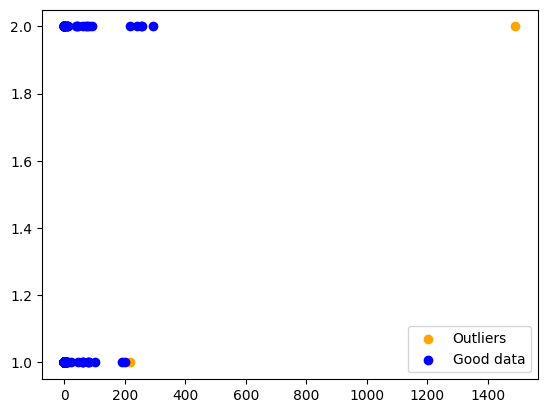

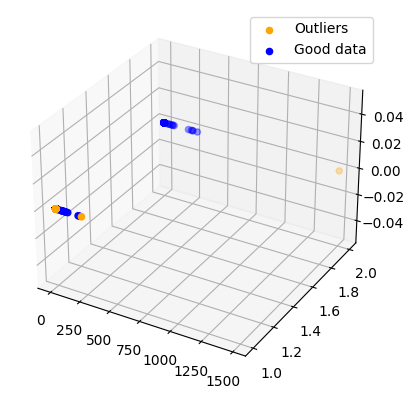

In [ ]:
##applying dbscan on all 0.015% of the dataset
pred_dbscan_labels=DBSCAN_algo(train_dbscan,370,85)
outlier_indices,good_indices=get_outliers_good(pred_dbscan_labels , train_dbscan)
draw_2D(train_dbscan,outlier_indices , good_indices)
draw_3D(train_dbscan,outlier_indices , good_indices)

#Evaluation on DBSCAN

In [ ]:
F_score,Fprec,Frecall = calculate_scores(true_label, pred_dbscan_labels)#F_measure(pred_dbscan_labels,true_label) 
entropy_score =conditional_entropy(pred_dbscan_labels,true_label)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("F1 Score dbscan = ",F_score*100 , "%")
print("Precision dbscan = ",Fprec*100 , "%" )  
print("Recall dbscan = ",Frecall*100 , "%")
print("Conditional Entropy dbscan = ",entropy_score*100 , "%")  

F1 Score dbscan =  27.3325499412456 %
Precision dbscan =  100.0 %
Recall dbscan =  15.82959030896965 %
Conditional Entropy dbscan =  0.0 %
